---
format:
    html:
        embed-resources: true
---

## Feature Selection for Film Variables

#### Reading in the Data

In [ ]:
# installing necessary libraries
install.packages("naniar")
install.packages("leaps")
install.packages("glmnet")
library(dplyr)
library(naniar)
library(tidyr)
library(leaps)
library(glmnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘plyr’, ‘norm’, ‘visdat’, ‘viridis’, ‘UpSetR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6738   83865  144854  186493  244248 1728425 

In [ ]:
# reading in the cleaned film and stock data
films_stocks <- read.csv("../merged_data/films_stocks_clean.csv")

# keeping only the main genre
films_stocks$Genre <- sapply(strsplit(as.character(films_stocks$Genre), ", "), `[`, 1)

# converting to one-hot encoding
films_stocks$Rated <- as.factor(films_stocks$Rated)
films_stocks$Genre <- as.factor(films_stocks$Genre)
films_stocks$Country <- as.factor(films_stocks$Country)

# converting IMDB votes to numeric
films_stocks$IMDB.Votes <- as.numeric(gsub(",", "", films_stocks$IMDB.Votes))
summary(films_stocks$IMDB.Votes)
films_stocks$log_IMDB.Votes <- log1p(films_stocks$IMDB.Votes)

# converting Runtime to numeric
films_stocks$Runtime <- as.numeric(gsub(" min", "", films_stocks$Runtime))

# converting Box.Office to numeric
films_stocks$Box.Office <- as.numeric(gsub("[\\$,]", "", films_stocks$Box.Office))

### Forward Subet Selection

In [2]:
# running forward subset selection
X <- model.matrix(Adj.Close ~ Year + Genre + Runtime + Rated + IMDB.Rating + Metascore + IMDB.Votes + Box.Office, data = films_stocks)[,-1]
y <- films_stocks$Adj.Close

regfit.for <- regsubsets(x = X, y = y, method = "forward", nvmax = 27)

,(Intercept),Year,GenreAdventure,GenreAnimation,GenreBiography,GenreComedy,GenreCrime,GenreDrama,GenreFantasy,GenreHorror,⋯,RatedNot Rated,RatedPG,RatedPG-13,RatedR,RatedTV-MA,RatedUnrated,IMDB.Rating,Metascore,IMDB.Votes,Box.Office
1,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
3,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
4,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
5,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
6,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
7,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
8,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
9,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
10,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE


Subset selection object
27 Variables  (and intercept)
               Forced in Forced out
Year               FALSE      FALSE
GenreAdventure     FALSE      FALSE
GenreAnimation     FALSE      FALSE
GenreBiography     FALSE      FALSE
GenreComedy        FALSE      FALSE
GenreCrime         FALSE      FALSE
GenreDrama         FALSE      FALSE
GenreFantasy       FALSE      FALSE
GenreHorror        FALSE      FALSE
GenreMystery       FALSE      FALSE
GenreSci-Fi        FALSE      FALSE
GenreThriller      FALSE      FALSE
Runtime            FALSE      FALSE
RatedG             FALSE      FALSE
RatedM             FALSE      FALSE
RatedM/PG          FALSE      FALSE
RatedNC-17         FALSE      FALSE
RatedNot Rated     FALSE      FALSE
RatedPG            FALSE      FALSE
RatedPG-13         FALSE      FALSE
RatedR             FALSE      FALSE
RatedTV-MA         FALSE      FALSE
RatedUnrated       FALSE      FALSE
IMDB.Rating        FALSE      FALSE
Metascore          FALSE      FALSE
IMDB.Votes

(Intercept)          Year   GenreComedy       Runtime     Metascore 
-1.271979e+05  6.389471e+01 -8.624519e+01  2.880753e+00  6.337684e+00 
   IMDB.Votes 
-8.141570e-04

(Intercept)           Year GenreAdventure GenreAnimation    GenreComedy 
 -1.315552e+05   6.692318e+01  -1.185168e+02  -1.809556e+02  -1.376828e+02 
    GenreCrime     GenreDrama    GenreHorror   GenreMystery        Runtime 
 -5.227037e+01  -1.190927e+02  -8.334692e+01   1.560558e+02   1.731979e+00 
        RatedG         RatedM      RatedM/PG     RatedNC-17 RatedNot Rated 
 -1.268962e+03  -6.716522e+02  -6.933502e+02  -1.450660e+03  -1.387857e+03 
       RatedPG     RatedPG-13         RatedR     RatedTV-MA   RatedUnrated 
 -1.500283e+03  -1.553715e+03  -1.547700e+03  -1.659942e+03  -1.546805e+03 
     Metascore     IMDB.Votes 
  6.377915e+00  -8.466843e-04

(Intercept)           Year GenreAdventure GenreAnimation    GenreComedy 
 -1.315552e+05   6.692318e+01  -1.185168e+02  -1.809556e+02  -1.376828e+02 
    GenreCrime     GenreDrama    GenreHorror   GenreMystery        Runtime 
 -5.227037e+01  -1.190927e+02  -8.334692e+01   1.560558e+02   1.731979e+00 
        RatedG         RatedM      RatedM/PG     RatedNC-17 RatedNot Rated 
 -1.268962e+03  -6.716522e+02  -6.933502e+02  -1.450660e+03  -1.387857e+03 
       RatedPG     RatedPG-13         RatedR     RatedTV-MA   RatedUnrated 
 -1.500283e+03  -1.553715e+03  -1.547700e+03  -1.659942e+03  -1.546805e+03 
     Metascore     IMDB.Votes 
  6.377915e+00  -8.466843e-04

[1] "optimal feature subset-size according to BIC:"
[2] "5"                                            


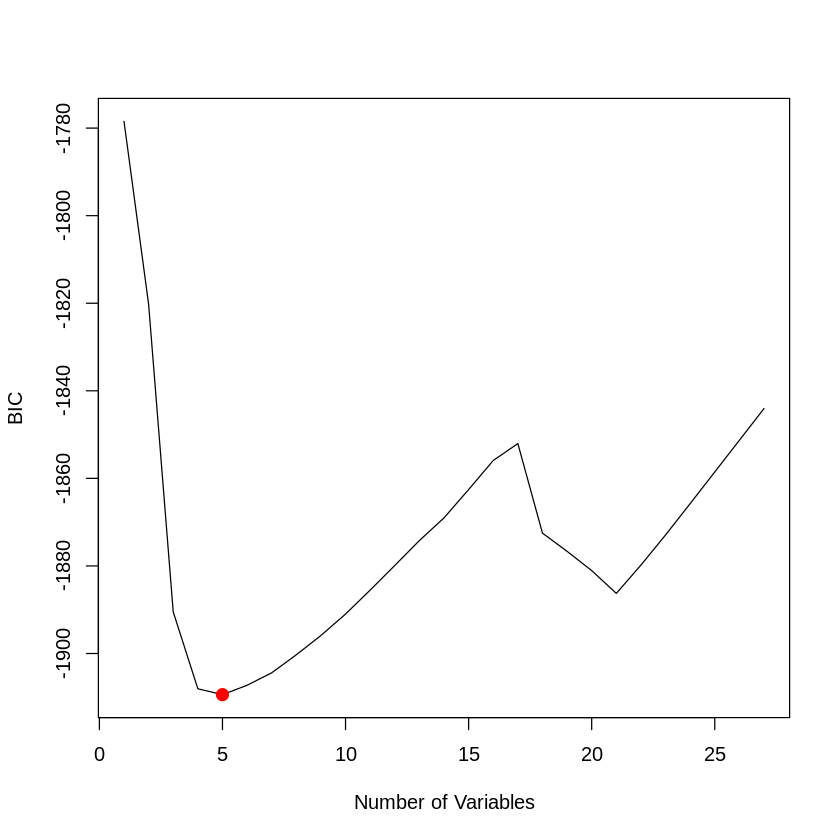

[1] "optimal feature subset-size according to cp:"
[2] "21"                                          
[1] "optimal feature subset-size according to ADJR2:"
[2] "21"                                             


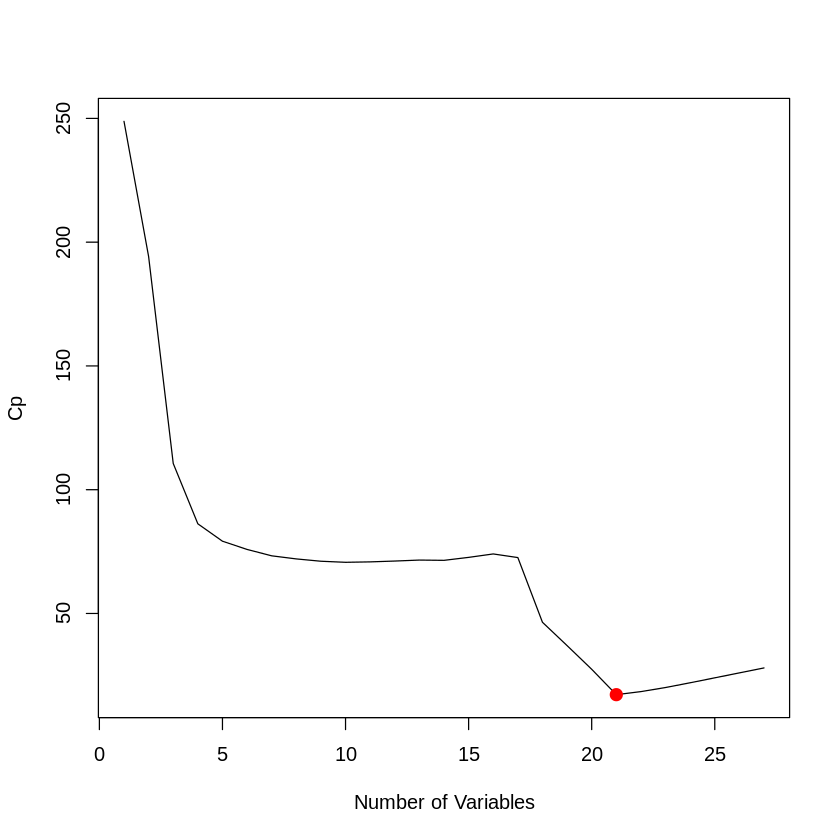

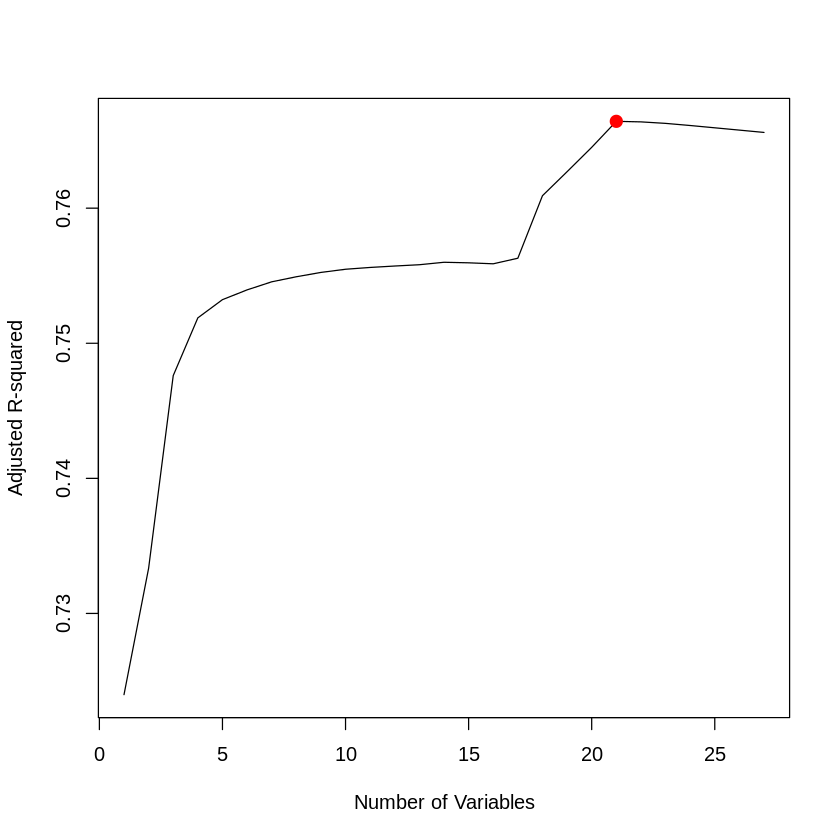

In [ ]:
# getting the summary
reg.summary=summary(regfit.for)
reg.summary$which
print(reg.summary)

# getting the criterion (BIC, CP, Adjusted R-squared)
m.bic = which.min(reg.summary$bic)
m.cp = which.min(reg.summary$cp)
m.adjr2 = which.max(reg.summary$adjr2)

coef(regfit.for, id = m.bic)
coef(regfit.for, id = m.cp)
coef(regfit.for, id = m.adjr2)

# plotting BIC
m=which.min(reg.summary$bic)
print(c("optimal feature subset-size according to BIC:",m))
plot(reg.summary$bic,xlab="Number of Variables",ylab="BIC",type='l')
points(m.bic, reg.summary$bic[m.bic], col="red", cex=2, pch=20)

# plotting CP
plot(reg.summary$cp,xlab="Number of Variables",ylab="Cp",type='l')
m=which.min(reg.summary$cp)
print(c("optimal feature subset-size according to cp:",m))
points(m.cp, reg.summary$cp[m.cp], col="red", cex=2, pch=20)

# plotting Adjusted R-sqaured:
m=which.max(reg.summary$adjr2)
print(c("optimal feature subset-size according to ADJR2:",m))
plot(reg.summary$adjr2, xlab="Number of Variables", ylab="Adjusted R-squared", type='l')
points(m.adjr2, reg.summary$adjr2[m.adjr2], col="red", cex=2, pch=20)

### Backward Subet Selection

In [4]:
# running backward subset selection
X <- model.matrix(Adj.Close ~ Year + Genre + Runtime + Rated + IMDB.Rating + Metascore + IMDB.Votes + Box.Office, data = films_stocks)[,-1]
y <- films_stocks$Adj.Close

regfit.back <- regsubsets(x = X, y = y, method = "backward", nvmax = 27)

,(Intercept),Year,GenreAdventure,GenreAnimation,GenreBiography,GenreComedy,GenreCrime,GenreDrama,GenreFantasy,GenreHorror,⋯,RatedNot Rated,RatedPG,RatedPG-13,RatedR,RatedTV-MA,RatedUnrated,IMDB.Rating,Metascore,IMDB.Votes,Box.Office
1,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
3,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
4,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
5,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
6,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
7,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
8,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
9,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
10,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE


Subset selection object
27 Variables  (and intercept)
               Forced in Forced out
Year               FALSE      FALSE
GenreAdventure     FALSE      FALSE
GenreAnimation     FALSE      FALSE
GenreBiography     FALSE      FALSE
GenreComedy        FALSE      FALSE
GenreCrime         FALSE      FALSE
GenreDrama         FALSE      FALSE
GenreFantasy       FALSE      FALSE
GenreHorror        FALSE      FALSE
GenreMystery       FALSE      FALSE
GenreSci-Fi        FALSE      FALSE
GenreThriller      FALSE      FALSE
Runtime            FALSE      FALSE
RatedG             FALSE      FALSE
RatedM             FALSE      FALSE
RatedM/PG          FALSE      FALSE
RatedNC-17         FALSE      FALSE
RatedNot Rated     FALSE      FALSE
RatedPG            FALSE      FALSE
RatedPG-13         FALSE      FALSE
RatedR             FALSE      FALSE
RatedTV-MA         FALSE      FALSE
RatedUnrated       FALSE      FALSE
IMDB.Rating        FALSE      FALSE
Metascore          FALSE      FALSE
IMDB.Votes

(Intercept)           Year        Runtime         RatedG     RatedNC-17 
 -1.312926e+05   6.661264e+01   2.682606e+00  -1.124676e+03  -1.269751e+03 
RatedNot Rated        RatedPG     RatedPG-13         RatedR     RatedTV-MA 
 -1.169055e+03  -1.319087e+03  -1.334427e+03  -1.330620e+03  -1.371768e+03 
  RatedUnrated      Metascore     IMDB.Votes 
 -1.340570e+03   5.591789e+00  -7.677970e-04

(Intercept)           Year GenreAdventure GenreAnimation    GenreComedy 
 -1.319051e+05   6.698773e+01  -1.036956e+02  -1.659581e+02  -1.178373e+02 
    GenreDrama        Runtime         RatedG     RatedNC-17 RatedNot Rated 
 -9.886422e+01   2.006099e+00  -1.089037e+03  -1.312581e+03  -1.228371e+03 
       RatedPG     RatedPG-13         RatedR     RatedTV-MA   RatedUnrated 
 -1.320246e+03  -1.375345e+03  -1.379993e+03  -1.466357e+03  -1.383733e+03 
     Metascore     IMDB.Votes 
  6.301827e+00  -8.250078e-04

(Intercept)           Year GenreAdventure GenreAnimation    GenreComedy 
 -1.315552e+05   6.692318e+01  -1.185168e+02  -1.809556e+02  -1.376828e+02 
    GenreCrime     GenreDrama    GenreHorror   GenreMystery        Runtime 
 -5.227037e+01  -1.190927e+02  -8.334692e+01   1.560558e+02   1.731979e+00 
        RatedG         RatedM      RatedM/PG     RatedNC-17 RatedNot Rated 
 -1.268962e+03  -6.716522e+02  -6.933502e+02  -1.450660e+03  -1.387857e+03 
       RatedPG     RatedPG-13         RatedR     RatedTV-MA   RatedUnrated 
 -1.500283e+03  -1.553715e+03  -1.547700e+03  -1.659942e+03  -1.546805e+03 
     Metascore     IMDB.Votes 
  6.377915e+00  -8.466843e-04

[1] "optimal feature subset-size according to BIC:"
[2] "12"                                           


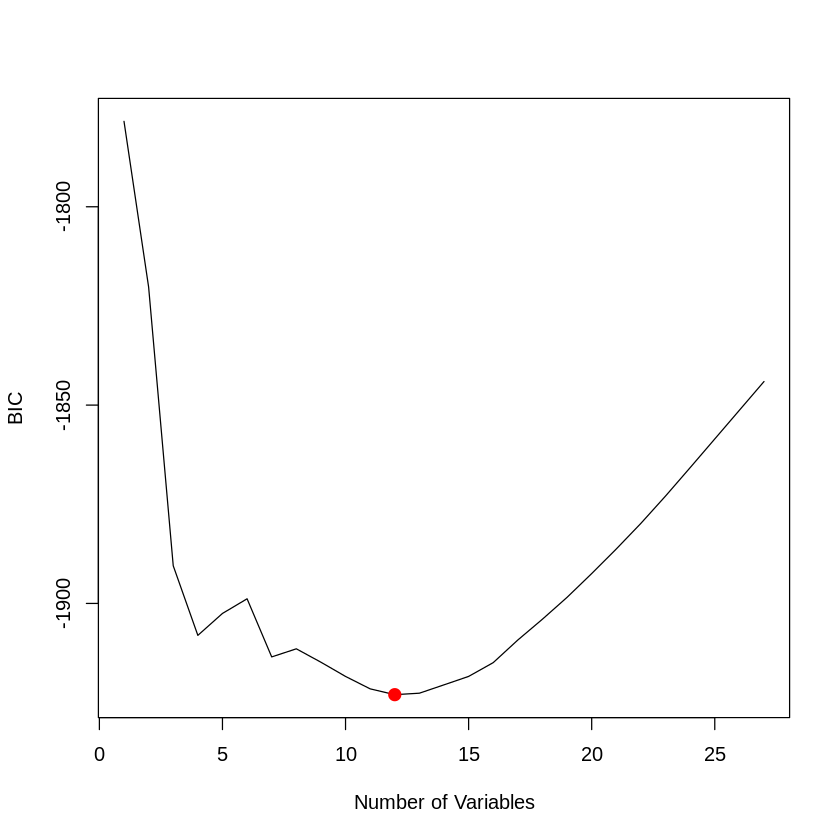

[1] "optimal feature subset-size according to cp:"
[2] "16"                                          
[1] "optimal feature subset-size according to ADJR2:"
[2] "21"                                             


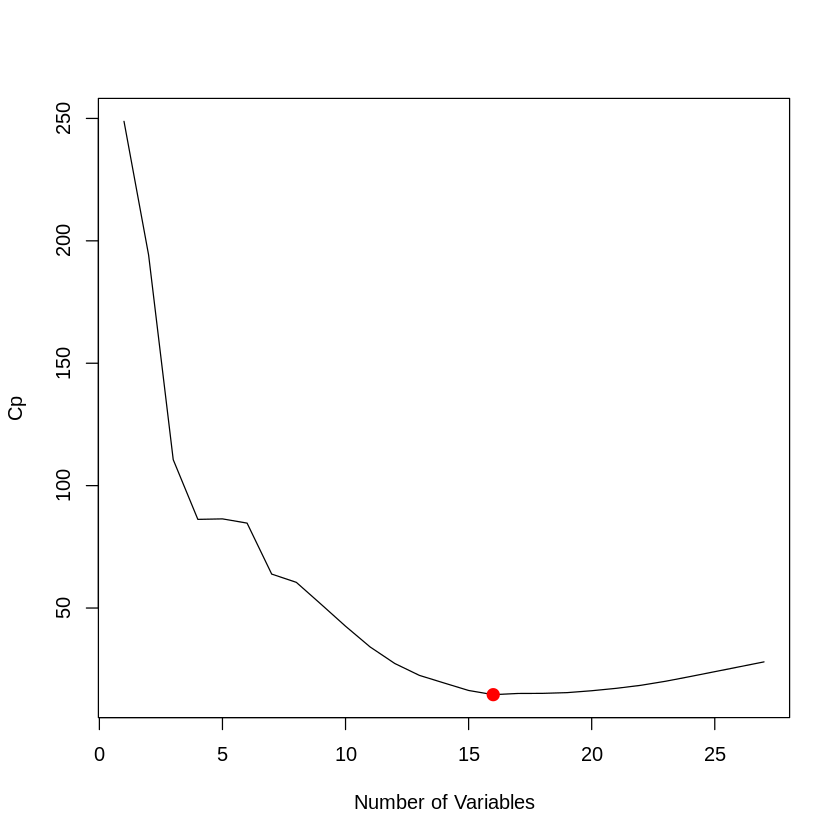

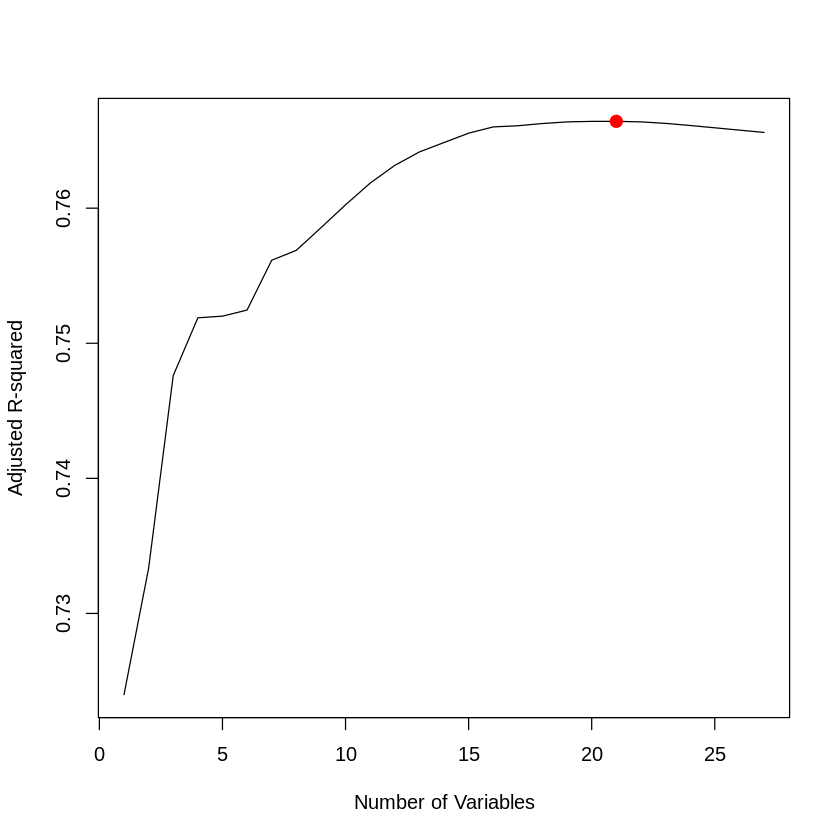

In [ ]:
# getting the summary
reg.summary=summary(regfit.back)
reg.summary$which
print(reg.summary)

# getting the criterion (BIC, CP, Adjusted R-squared)
m.bic = which.min(reg.summary$bic)
m.cp = which.min(reg.summary$cp)
m.adjr2 = which.max(reg.summary$adjr2)

coef(regfit.back, id = m.bic)
coef(regfit.back, id = m.cp)
coef(regfit.back, id = m.adjr2)

# plotting BIC
m=which.min(reg.summary$bic)
print(c("optimal feature subset-size according to BIC:",m))
plot(reg.summary$bic,xlab="Number of Variables",ylab="BIC",type='l')
points(m.bic, reg.summary$bic[m.bic], col="red", cex=2, pch=20)

# plotting CP
plot(reg.summary$cp,xlab="Number of Variables",ylab="Cp",type='l')
m=which.min(reg.summary$cp)
print(c("optimal feature subset-size according to cp:",m))
points(m.cp, reg.summary$cp[m.cp], col="red", cex=2, pch=20)

# plotting Adjusted R-sqaured:
m=which.max(reg.summary$adjr2)
print(c("optimal feature subset-size according to ADJR2:",m))
plot(reg.summary$adjr2, xlab="Number of Variables", ylab="Adjusted R-squared", type='l')
points(m.adjr2, reg.summary$adjr2[m.adjr2], col="red", cex=2, pch=20)

### Lasso Selection

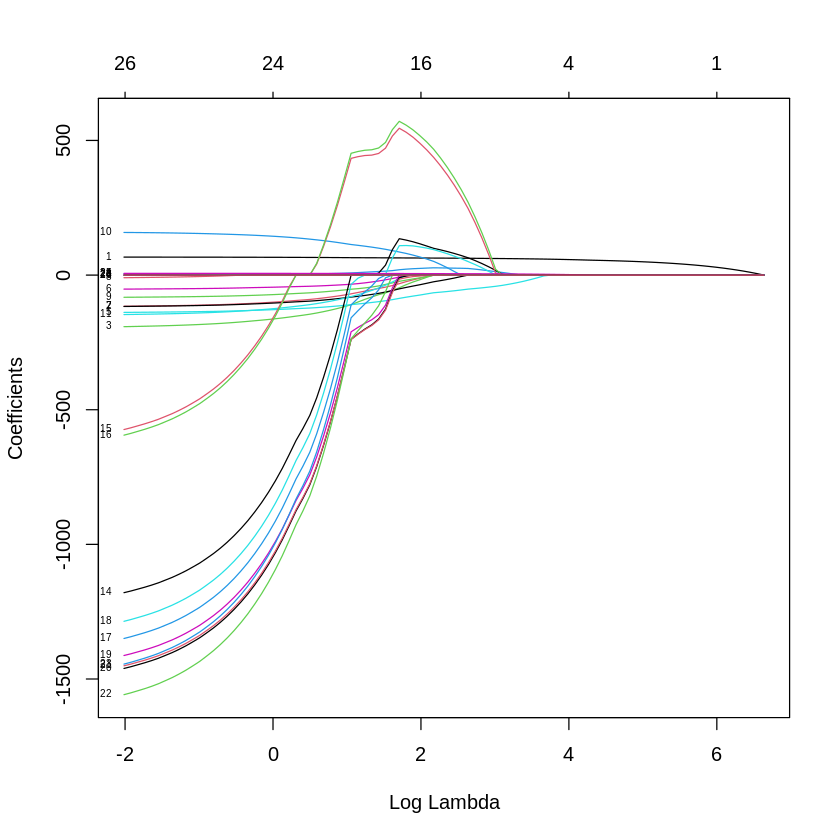

In [ ]:
# Define the modeling formula
formula <- Adj.Close ~ Year + Genre + Runtime + Rated + IMDB.Rating + Metascore + IMDB.Votes + Box.Office

# Create design matrix (x) and response vector (y)
x <- model.matrix(formula, data = films_stocks)[, -1]  # remove intercept
y <- films_stocks$Adj.Close

# Fit lasso without cross-validation
lasso_model <- glmnet(x, y, alpha = 1)

# Find lambda where exactly 8 predictors are selected
chosen_lambda <- NULL


# running the lasso selection model
for (lambda_val in lasso_model$lambda) {
  coef_lasso <- coef(lasso_model, s = lambda_val)
  non_zero_coeffs <- sum(coef_lasso != 0) - 1  # exclude intercept
  if (non_zero_coeffs == 8) {
    chosen_lambda <- lambda_val
    cat("Lambda when 8 coefficients are non-zero:", lambda_val, "\n")
    print(coef_lasso)
    break
  }
}

# plotting the lasso results
plot(lasso_model, xvar = "lambda", label = TRUE)
if (!is.null(chosen_lambda)) {
  abline(v = log(chosen_lambda), col = "red", lty = 2)
}

In [7]:
# Perform cross-validation to choose lambda
lasso_cv <- cv.glmnet(x, y, alpha = 1, nfolds = 10)

# Extract the lambda at 1 standard error
lambda_1se <- lasso_cv$lambda.1se
error_1se <- lasso_cv$cvm[lasso_cv$lambda == lambda_1se]

cat("Lambda at 1SE:", lambda_1se, "\n")
cat("Cross-validation error at 1SE:", error_1se, "\n")

Lambda at 1SE: 38.88553 
Cross-validation error at 1SE: 210557 


In [8]:
# Coefficients at lambda.1se (simpler model with good generalization)
coef(lasso_cv, s = "lambda.1se")

# Number of non-zero predictors (excluding intercept)
nonzero_at_1se <- sum(coef(lasso_cv, s = "lambda.1se") != 0) - 1
cat("Number of predictors at lambda.1se:", nonzero_at_1se, "\n")

28 x 1 sparse Matrix of class "dgCMatrix"
                          s1
(Intercept)    -1.180926e+05
Year            5.949273e+01
GenreAdventure  .           
GenreAnimation  .           
GenreBiography  .           
GenreComedy    -3.084315e+00
GenreCrime      .           
GenreDrama      .           
GenreFantasy    .           
GenreHorror     .           
GenreMystery    .           
GenreSci-Fi     .           
GenreThriller   .           
Runtime         1.048787e+00
RatedG          .           
RatedM          .           
RatedM/PG       .           
RatedNC-17      .           
RatedNot Rated  .           
RatedPG         .           
RatedPG-13      .           
RatedR          .           
RatedTV-MA      .           
RatedUnrated    .           
IMDB.Rating     .           
Metascore       3.137034e+00
IMDB.Votes     -3.549603e-04
Box.Office      .           

Number of predictors at lambda.1se: 5 


### Full Subset Selection

In [9]:
# running full subset selection
X <- model.matrix(Adj.Close ~ Year + Genre + Runtime + Rated + IMDB.Rating + Metascore + IMDB.Votes + Box.Office, data = films_stocks)[,-1]
y <- films_stocks$Adj.Close

regfit.full <- regsubsets(x = X, y = y, method = "exhaustive", nvmax = 27)

,(Intercept),Year,GenreAdventure,GenreAnimation,GenreBiography,GenreComedy,GenreCrime,GenreDrama,GenreFantasy,GenreHorror,⋯,RatedNot Rated,RatedPG,RatedPG-13,RatedR,RatedTV-MA,RatedUnrated,IMDB.Rating,Metascore,IMDB.Votes,Box.Office
1,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
3,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
4,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
5,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
6,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
7,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
8,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
9,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
10,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE


Subset selection object
27 Variables  (and intercept)
               Forced in Forced out
Year               FALSE      FALSE
GenreAdventure     FALSE      FALSE
GenreAnimation     FALSE      FALSE
GenreBiography     FALSE      FALSE
GenreComedy        FALSE      FALSE
GenreCrime         FALSE      FALSE
GenreDrama         FALSE      FALSE
GenreFantasy       FALSE      FALSE
GenreHorror        FALSE      FALSE
GenreMystery       FALSE      FALSE
GenreSci-Fi        FALSE      FALSE
GenreThriller      FALSE      FALSE
Runtime            FALSE      FALSE
RatedG             FALSE      FALSE
RatedM             FALSE      FALSE
RatedM/PG          FALSE      FALSE
RatedNC-17         FALSE      FALSE
RatedNot Rated     FALSE      FALSE
RatedPG            FALSE      FALSE
RatedPG-13         FALSE      FALSE
RatedR             FALSE      FALSE
RatedTV-MA         FALSE      FALSE
RatedUnrated       FALSE      FALSE
IMDB.Rating        FALSE      FALSE
Metascore          FALSE      FALSE
IMDB.Votes

(Intercept)           Year        Runtime         RatedG     RatedNC-17 
 -1.312926e+05   6.661264e+01   2.682606e+00  -1.124676e+03  -1.269751e+03 
RatedNot Rated        RatedPG     RatedPG-13         RatedR     RatedTV-MA 
 -1.169055e+03  -1.319087e+03  -1.334427e+03  -1.330620e+03  -1.371768e+03 
  RatedUnrated      Metascore     IMDB.Votes 
 -1.340570e+03   5.591789e+00  -7.677970e-04

(Intercept)           Year GenreAdventure GenreAnimation    GenreComedy 
 -1.319051e+05   6.698773e+01  -1.036956e+02  -1.659581e+02  -1.178373e+02 
    GenreDrama        Runtime         RatedG     RatedNC-17 RatedNot Rated 
 -9.886422e+01   2.006099e+00  -1.089037e+03  -1.312581e+03  -1.228371e+03 
       RatedPG     RatedPG-13         RatedR     RatedTV-MA   RatedUnrated 
 -1.320246e+03  -1.375345e+03  -1.379993e+03  -1.466357e+03  -1.383733e+03 
     Metascore     IMDB.Votes 
  6.301827e+00  -8.250078e-04

(Intercept)           Year GenreAdventure GenreAnimation    GenreComedy 
 -1.315552e+05   6.692318e+01  -1.185168e+02  -1.809556e+02  -1.376828e+02 
    GenreCrime     GenreDrama    GenreHorror   GenreMystery        Runtime 
 -5.227037e+01  -1.190927e+02  -8.334692e+01   1.560558e+02   1.731979e+00 
        RatedG         RatedM      RatedM/PG     RatedNC-17 RatedNot Rated 
 -1.268962e+03  -6.716522e+02  -6.933502e+02  -1.450660e+03  -1.387857e+03 
       RatedPG     RatedPG-13         RatedR     RatedTV-MA   RatedUnrated 
 -1.500283e+03  -1.553715e+03  -1.547700e+03  -1.659942e+03  -1.546805e+03 
     Metascore     IMDB.Votes 
  6.377915e+00  -8.466843e-04

[1] "optimal feature subset-size according to BIC:"
[2] "12"                                           


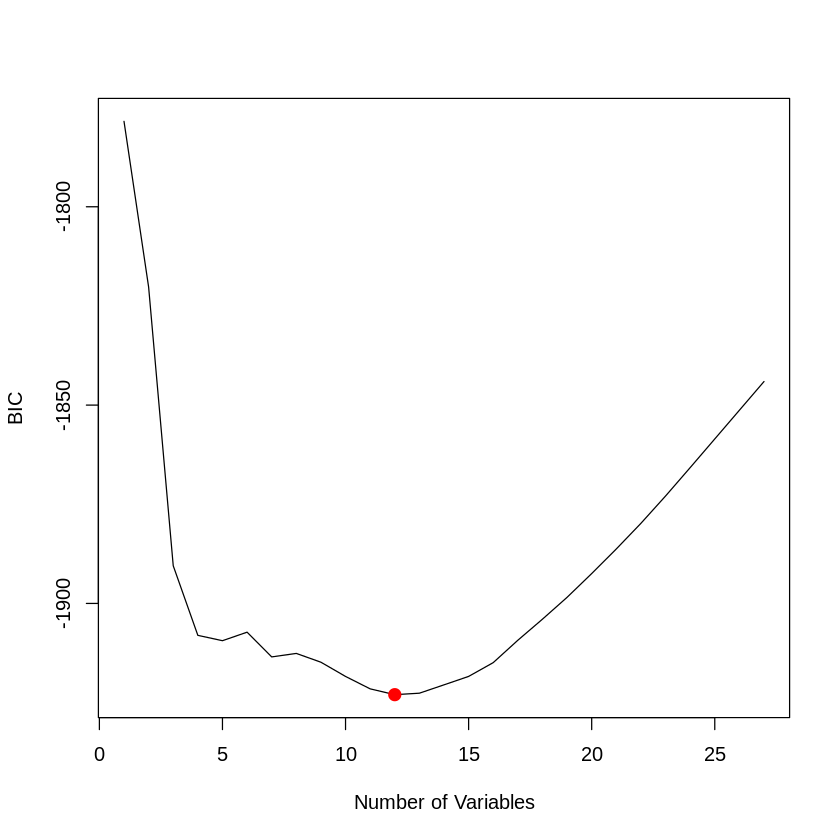

[1] "optimal feature subset-size according to cp:"
[2] "16"                                          
[1] "optimal feature subset-size according to ADJR2:"
[2] "21"                                             


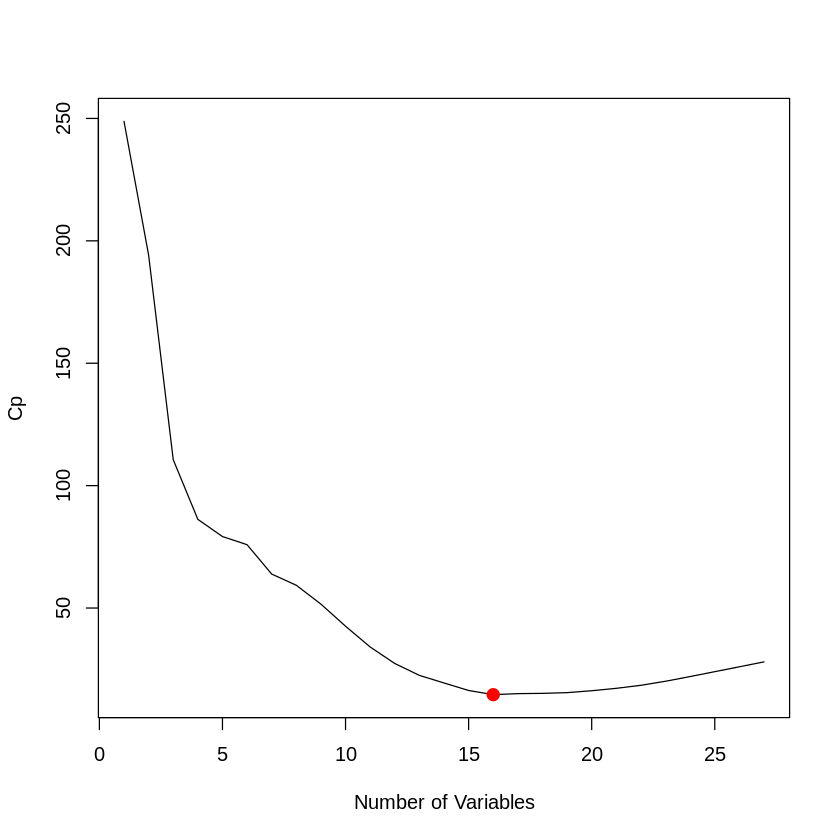

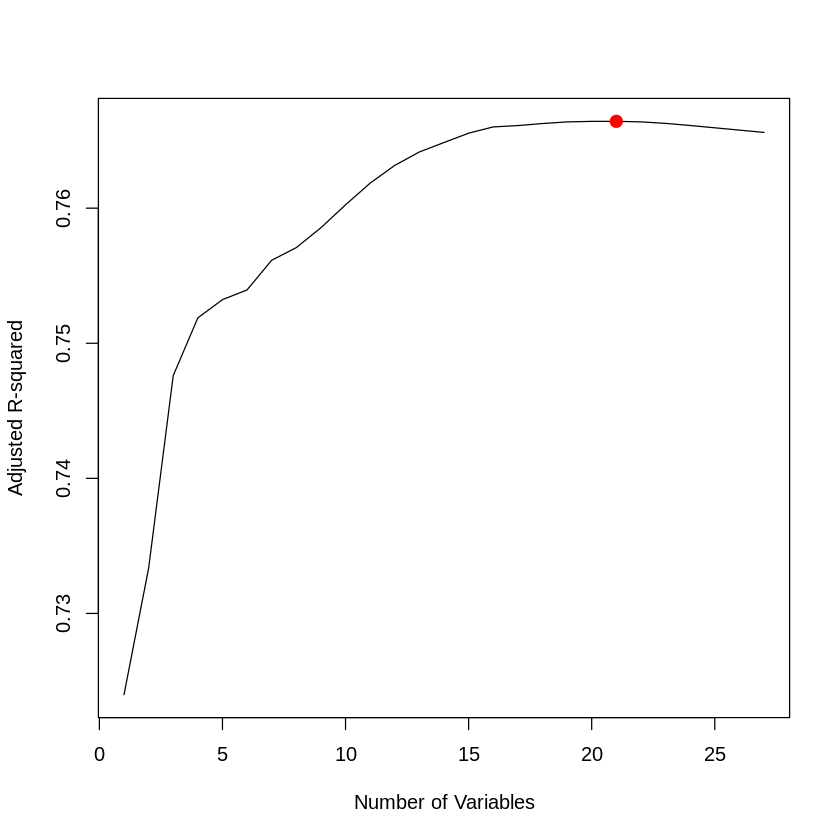

In [ ]:
# getting the summary
reg.summary=summary(regfit.full)
reg.summary$which
print(reg.summary)

# getting the criterion (BIC, CP, Adjusted R-squared)
m.bic = which.min(reg.summary$bic)
m.cp = which.min(reg.summary$cp)
m.adjr2 = which.max(reg.summary$adjr2)

coef(regfit.full, id = m.bic)
coef(regfit.full, id = m.cp)
coef(regfit.full, id = m.adjr2)

# plotting BIC
m=which.min(reg.summary$bic)
print(c("optimal feature subset-size according to BIC:",m))
plot(reg.summary$bic,xlab="Number of Variables",ylab="BIC",type='l')
points(m.bic, reg.summary$bic[m.bic], col="red", cex=2, pch=20)

# plotting CP
plot(reg.summary$cp,xlab="Number of Variables",ylab="Cp",type='l')
m=which.min(reg.summary$cp)
print(c("optimal feature subset-size according to cp:",m))
points(m.cp, reg.summary$cp[m.cp], col="red", cex=2, pch=20)

# plotting Adjusted R-sqaured:
m=which.max(reg.summary$adjr2)
print(c("optimal feature subset-size according to ADJR2:",m))
plot(reg.summary$adjr2, xlab="Number of Variables", ylab="Adjusted R-squared", type='l')
points(m.adjr2, reg.summary$adjr2[m.adjr2], col="red", cex=2, pch=20)

## Conclusions

There were a couple of different sets of feature selected across the three methods.

**Forward selected either 5 features or 21 features**:\
BIC: Year, GenreComedy, Runtime, MetaScore, IMDB.Votes

CP/ADJ: Year, GenreAdventure, GenreAnimation, GenreComedy, GenreCrime, GenreDrama, GenreHorror, GenreMystery, Runtime, RatedG, RatedM, RatedM/PG, RatedNC-17, RatedNot, RatedPG, RatedPG-13, RatedR, RatedTV-MA, RatedUnrated, Metascore, IMDB.Votes

**Backward selected either 12, 16, or 21 features**:\
BIC: Year, Runtime, RatedG, RatedNC-17, RatedNot, RatedPG, RatedPG-13, RatedR, RatedTV-MA, RatedUnrated, Metascore, IMDB.Votes

CP: Year, GenreAdventure, GenreAnimation, GenreComedy, GenreDrama, Runtime, RatedG, RatedNC-17, RatedNot, RatedPG, RatedPG-13, RatedR, RatedTV-MA, RatedUnrated, Metascore, IMDB.Votes

ADJ: Year, GenreAdventure, GenreAnimation, GenreComedy, GenreCrime, GenreDrama, GenreHorror, GenreMystery, Runtime, RatedG, RatedM, RatedM/PG, RatedNC-17, RatedNot, RatedPG, RatedPG-13, RatedR, RatedTV-MA, RatedUnrated, Metascore, IMDB.Votes

**Lasso selected 5 features**:\
Year, GenreComedy, Runtime, Metascore, IMDB.Votes

**Full selected either 12, 16, or 21 features**:\
BIC: Year, Runtime, RatedG, RatedNC-17, RatedNot, RatedPG, RatedPG-13, RatedR, RatedTV-MA, RatedUnrated, Metascore, IMDB.Votes

CP: Year, GenreAdventure, GenreAnimation, GenreComedy, GenreDrama, Runtime, RatedG, RatedNC-17, RatedNot, RatedPG, RatedPG-13, RatedR, RatedTV-MA, RatedUnrated, Metascore, IMDB.Votes

ADJ: Year, GenreAdventure, GenreAnimation, GenreComedy, GenreCrime, GenreDrama, GenreHorror, GenreMystery, Runtime, RatedG, RatedM, RatedM/PG, RatedNC-17, RatedNot, RatedPG, RatedPG-13, RatedR, RatedTV-MA, RatedUnrated, Metascore, IMDB.Votes



**Conclusions**\
Across all the methods and models **Year, Runtime, MetaScore, and IMDB.Votes** were always present.
The difference was whether to include variations of the Genre and Rated variables. We will move forward with attempting the model with these 4 base features and iteratively adding the additional ones to see which add to the model without overfitting.
